# Лінійні моделі

In [1]:
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Лінійна регресія

Згенеруємо синтетичні дані для прикладу

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

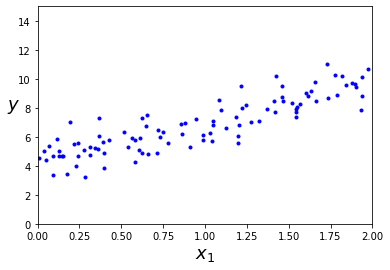

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

Знайдені коефіціети

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

Як отримати значення функції регресії у новій точці?

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Судячи з графіку, виглядає логічно.

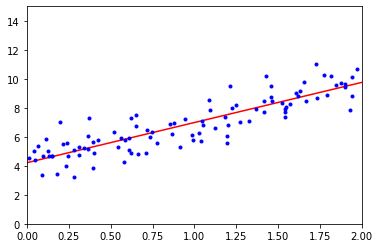

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Розвяжемо цю ж задачу за допомогою sklearn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

### Поліноміальна регресія

In [10]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

Згенеруємо штучний датасет з відгуком y, що поліноміально залежить від ознак X. 

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

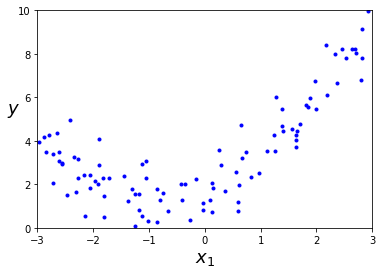

In [12]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

"Доповнимо" датасет поліноміальними ознаками

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
print(X[0]**2)

[-0.75275929]
[-0.75275929  0.56664654]
[0.56664654]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Давайте спробуємо різні степені поліноміальних ознак: 1, 2, 300

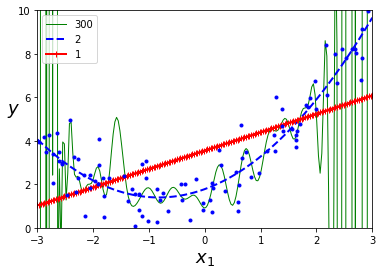

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_new = np.linspace(-3, 3, num=200).reshape(-1,1)

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

##### Середньоквадратична помилка моделі

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.5, random_state=10)

In [19]:
X_train.shape

(50, 1)

In [20]:
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [21]:
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [22]:
y_val_predict = model.predict(X_val_poly_scaled)
val_error = mean_squared_error(y_val, y_val_predict)

In [23]:
print(val_error)

0.9418567491761436


In [24]:
def get_error(poly_degree, X_train, X_val, y_train, y_val):
    poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=poly_degree, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
    
    X_train_poly_scaled = poly_scaler.fit_transform(X_train)
    X_val_poly_scaled = poly_scaler.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)
    y_val_predict = model.predict(X_val_poly_scaled)
    
    val_error = mean_squared_error(y_val, y_val_predict)
    
    return val_error

In [25]:
val_errors = [get_error(poly_degree, X_train, X_val, y_train, y_val) for poly_degree in range(1,11)]

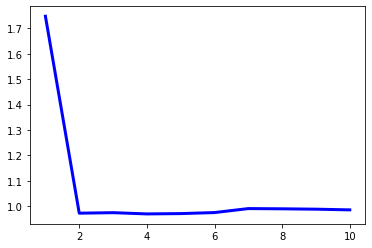

In [26]:
plt.plot(list(range(1,11)), np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [27]:
final_pipeline = poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("linear_model", LinearRegression())
    ])

In [28]:
final_pipeline.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

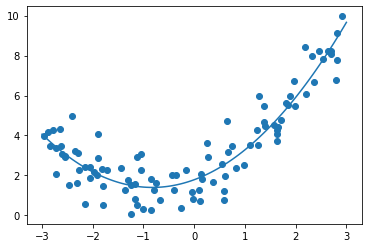

In [29]:
X_test = np.linspace(-3, 3, 100)
plt.plot(X_test, final_pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.scatter(X, y, label="True function")

### Регуляризація

In [30]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

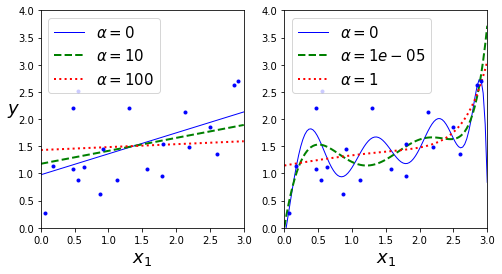

In [32]:
def plot_model(model_class, polynomial, alphas, degree = 10, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


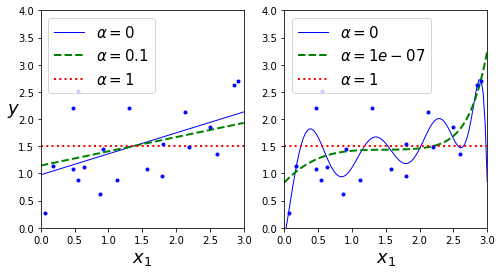

In [33]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

### Логістична регресія

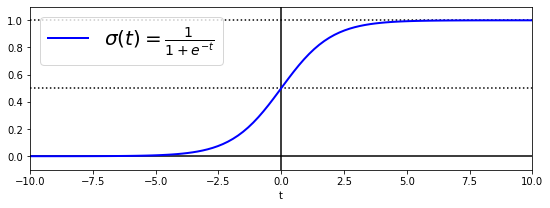

In [34]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [35]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [36]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
iris["data"].shape

(150, 4)

In [38]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

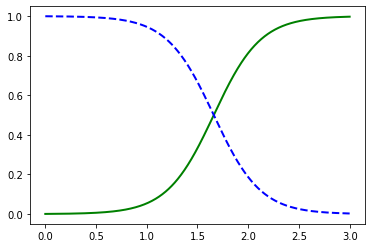

In [40]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


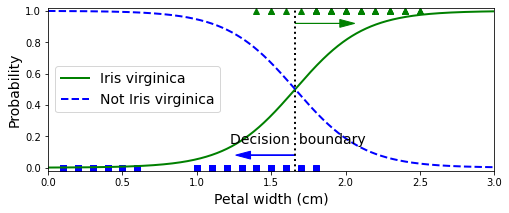

In [41]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [42]:
decision_boundary

array([1.66066066])

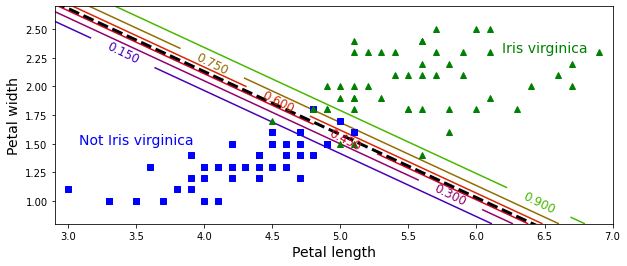

In [43]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [44]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

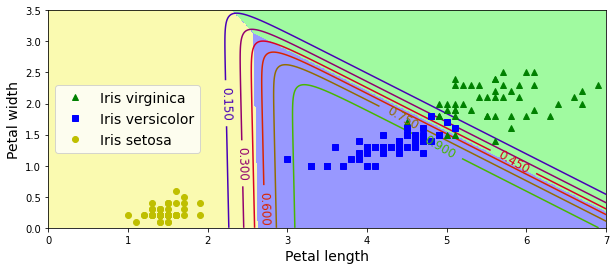

In [45]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Нарешті, натренуємо модель на усіх ознаках. 

In [46]:
X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [47]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [48]:
y_pred = softmax_reg.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(y_test, y_pred)

1.0

In [51]:
confusion_matrix(y_test, y_pred)

array([[9, 0, 0],
       [0, 8, 0],
       [0, 0, 6]])

# Завдання 

In [52]:
import pandas as pd

from IPython.display import Image

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Завдання 1. Знайдіть у явному вигляді розв'язок задачі лінійної регресії з квадратичною регуляризацією (Ridge). Сфотографуйте виведення та підв"яжіть до цього файлу (\<img src="image.png"\>)

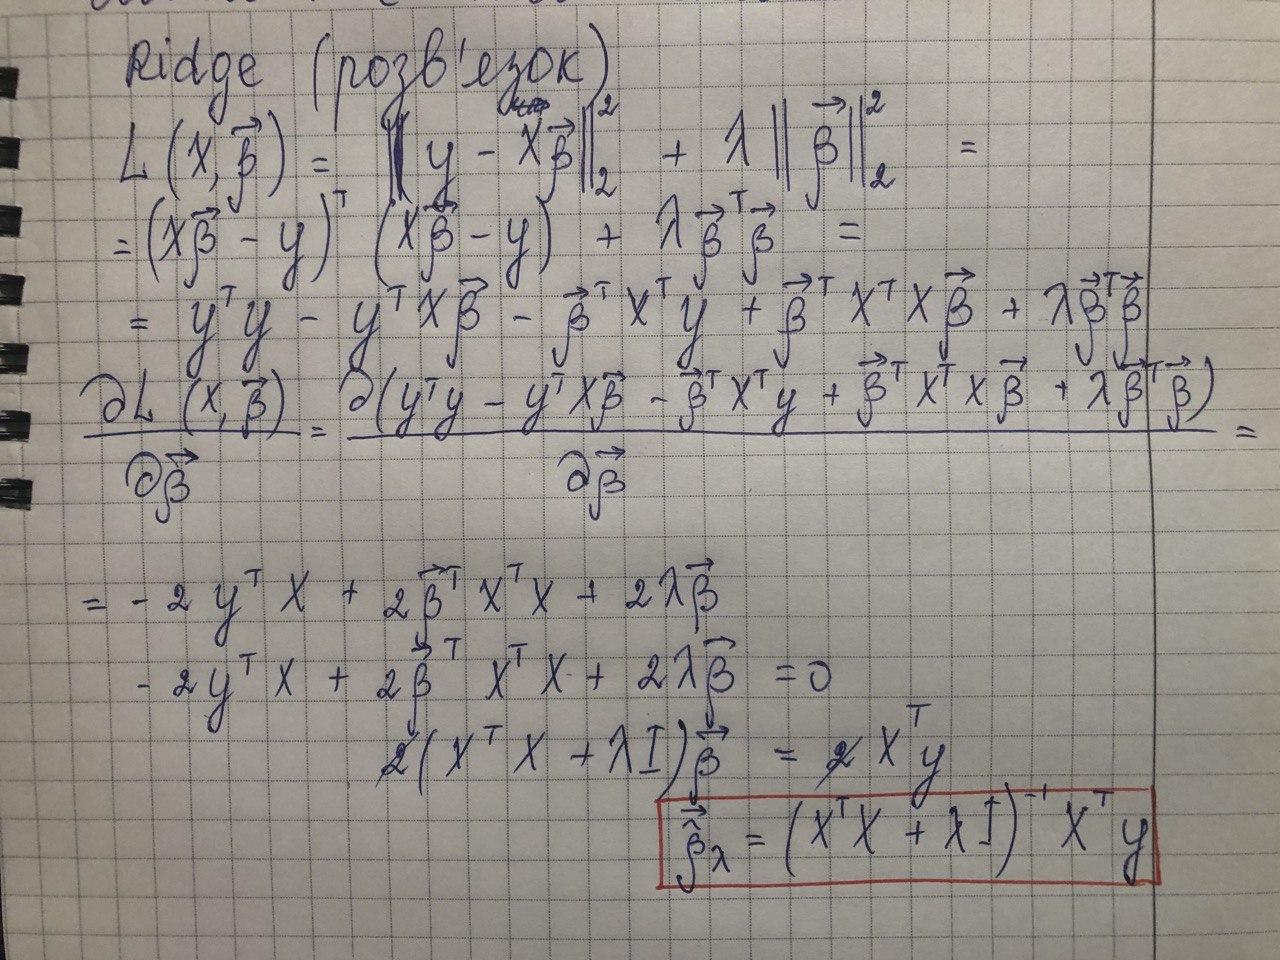

In [53]:
PICTURE_PATH = "../images/"
Image(filename = PICTURE_PATH + "02-ridge.jpg", width=900, height=1600)

Завдання 2. Натренуйте модель поліноміальної регресії зі степенями 1, 4, 15. Для степені 15 натренуйте модель з регуляризацією. Спробуйте різні параметри регуляризації. Прокоментуйте.

In [54]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [55]:
X = np.reshape(X, (-1, 1)) # convert X to 2d array

In [56]:
results = []

Text(0.5, 1.0, 'degree = 1')

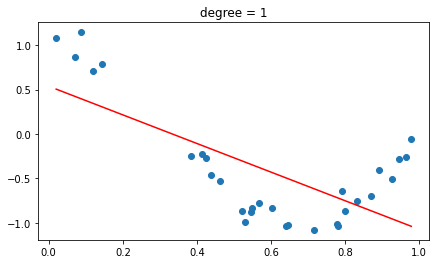

In [57]:
linreg = LinearRegression()
linreg.fit(X, y)
b0, b1 = linreg.intercept_, linreg.coef_[0]
y_hat = linreg.predict(X)
results.append(['LR', 1, mean_squared_error(y, y_hat)])

plt.figure(figsize=(7,4))
plt.scatter(X[:,0], y)
plt.plot(X[:,0], y_hat, color='red')
plt.title('degree = 1')

Does not look like linear relationship at all. Simple linear regression fails.

Text(0.5, 1.0, 'degree = 4')

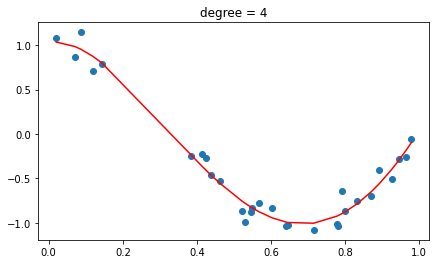

In [58]:
degree = 4
pf = PolynomialFeatures(degree, include_bias=False)
X_poly = pf.fit_transform(X)

linreg = LinearRegression()
linreg.fit(X_poly, y)
b0, b1 = linreg.intercept_, linreg.coef_[0]
y_hat = linreg.predict(X_poly)
results.append(('LR', degree, mean_squared_error(y, y_hat)))

plt.figure(figsize=(7,4))
plt.scatter(X[:,0], y)
plt.plot(X[:,0], y_hat, color='red')
plt.title(f'degree = {degree}')

Looks pretty good. Line is pretty close to all points.

/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/daryna/anaconda3/envs/ml_ukma/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17612629534727617, tolerance: 0.0012875751792313249
  positive)


Text(0.5, 0.98, 'degree = 15')

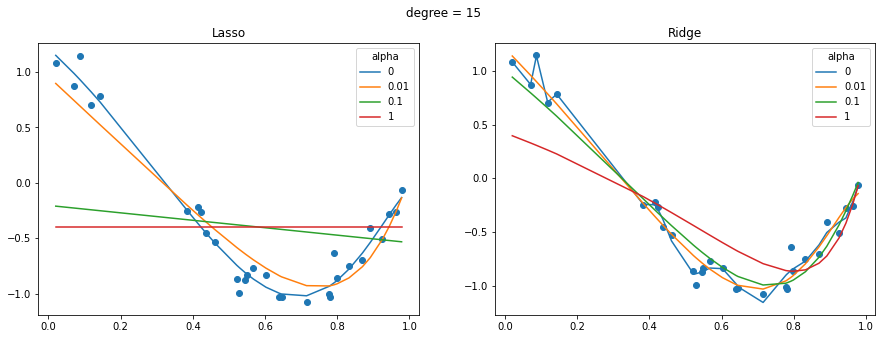

In [59]:
degree = 15
pf = PolynomialFeatures(degree, include_bias=False)
X_poly = pf.fit_transform(X)

fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].scatter(X[:,0], y)
axes[1].scatter(X[:,0], y)

for alpha in [0, 1e-2, 1e-1,  1]:
    linreg = Lasso(alpha=alpha)
    linreg.fit(X_poly, y)
    b0, b1 = linreg.intercept_, linreg.coef_[0]
    y_hat = linreg.predict(X_poly)
    results.append((f'Lasso({alpha})', degree, mean_squared_error(y, y_hat)))

    axes[0].plot(X[:,0], y_hat, label = alpha)
    axes[0].set_title('Lasso')
    axes[0].legend(title='alpha')
    
for alpha in [0, 1e-2, 1e-1,  1]:
    linreg = Ridge(alpha=alpha)
    linreg.fit(X_poly, y)
    b0, b1 = linreg.intercept_, linreg.coef_[0]
    y_hat = linreg.predict(X_poly)
    results.append((f'Ridge({alpha})', degree, mean_squared_error(y, y_hat)))

    axes[1].plot(X[:,0], y_hat, label = alpha)
    axes[1].set_title('Ridge')
    axes[1].legend(title='alpha')
    
fig.suptitle(f'degree = {degree}')

Lasso(0) and Ridge(0.01) are good at predicting values. Too much reguralization is bad for both models. Also Ridge(0) is overfitting - it's going to fail dramatically on new points.

In [60]:
pd.DataFrame(results, columns=['model', 'degree', 'mse']).sort_values('mse')

,model,degree,mse
6,Ridge(0),15,0.004986
1,LR,4,0.011565
2,Lasso(0),15,0.011742
7,Ridge(0.01),15,0.012628
8,Ridge(0.1),15,0.024254
3,Lasso(0.01),15,0.033041
9,Ridge(1),15,0.116239
0,LR,1,0.225892
4,Lasso(0.1),15,0.353285
5,Lasso(1),15,0.429192


Ridge(0) with degree=15 has smaller MSE, but it's only because of overfitting, it doesn't look like this model describes data relationships and learns the noise. Linear regression with degree 4, Lasso(0) and Ridge(0.01) have almost the same score and all of them are quite good. LR (degree=1), Lasso(0.1) and Lasso(1) with degree=15 are underfitting.

Завдання 3. Натренуйте модель логістичної регресії на вибірці про класифікацію вина. Попередньо розбийте вибірку на тренувальну та тестову частини. Яка точність отриманої моделі? Матриця невідповідностей?

In [61]:
from sklearn.datasets import load_wine
data = load_wine()

In [62]:
X, y = data['data'], data['target']
cols = data['feature_names']

In [63]:
X = pd.DataFrame(X, columns = cols)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [64]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify=y, random_state = 42)

# standart scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [65]:
# default params
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy:', np.mean(y_test==y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.9814814814814815


array([[18,  0,  0],
       [ 1, 20,  0],
       [ 0,  0, 15]])

There is only one point which was wrongly predicted - point from class 1 was predicted as class 0.

In [66]:
# optimize hyperparameters (just for fun, 98% score is already cool enough)
logreg = LogisticRegression(solver='saga',penalty='elasticnet', l1_ratio=0.01, C=0.1,  max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy:', np.mean(y_test==y_pred))

Accuracy: 1.0


In [67]:
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 15]])

Perfect score! On this test set at least. 